## Importing the relevant libraries that will be used in the upcoming codes

In [102]:
import networkx as ntx
import matplotlib.pyplot as plt
from collections import deque

# DFS

## The DFS function

In [103]:
def dfs_tree(graph, start):
    visited = set()
    stack = [(start, None)]  # (node, parent)

    dfs_tree_edges = {}

    while stack:
        node, parent = stack.pop()

        if node not in visited:
            visited.add(node)

            if parent is not None:
                dfs_tree_edges[(parent, node)] = True

            # Explore neighbors in reverse order to match the order of the dfs_edges function
            neighbors = list(graph.neighbors(node))
            neighbors.reverse()
            stack.extend((neighbor, node) for neighbor in
                         neighbors if neighbor not in visited)

    return dfs_tree_edges


## Running DFS on a directed graph

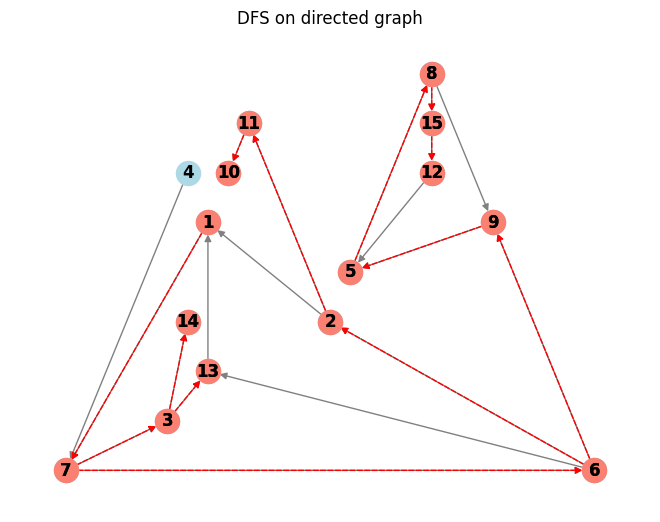

In [116]:
# Creating a directed graph
G = ntx.DiGraph()

# Adding nodes and edges to the graph
# Node 4 is intentionally left dead
# Edge going from 6 to 9 is a bridge
G.add_edges_from([(3, 14), (3, 13), (7, 3), (13, 1), (6, 13), (7, 6),
                  (1, 7), (4, 7), (6, 9), (2, 1), (6, 2), (2, 11), (11, 10),
                  (9, 5), (12, 5), (8, 9), (5, 8), (8, 15), (15, 12)])

# Set start node as wished and run DFS function to obtain the edge set for DFS tree
start_node = 1
dfs_tree_edges = dfs_tree(G, start_node)

# Creating the DFS graph with obtained edge set
dfs_tree_graph = ntx.DiGraph(list(dfs_tree_edges.keys()))

# Planar layout used to create a graph that will easily convey information
pos = ntx.planar_layout(G)

# Both the original and DFS versions of the graph are displayed to show the 
# DFS tree in contrast to the original graph it was performed on
ntx.draw(G, pos, with_labels=True, font_weight='bold',
         node_color='lightblue', edge_color='gray')
ntx.draw(dfs_tree_graph, pos, with_labels=True, font_weight='bold',
         node_color='salmon', edge_color='red', style='dashed')

plt.title("DFS on directed graph")
plt.show()

## Running DFS on an undirected graph

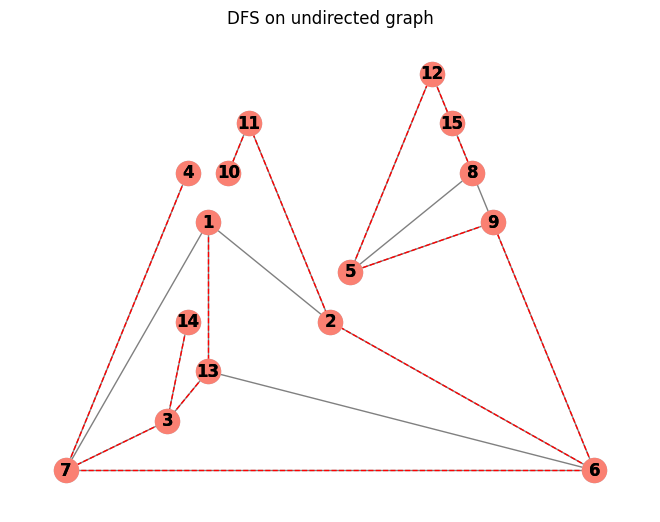

In [115]:
G = ntx.Graph()

G.add_edges_from([(3, 14), (3, 13), (7, 3), (13, 1), (6, 13), (7, 6),
                  (1, 7), (4, 7), (6, 9), (2, 1), (6, 2), (2, 11), (11, 10),
                  (9, 5), (12, 5), (8, 9), (5, 8), (8, 15), (15, 12)])

start_node = 1
dfs_tree_edges = dfs_tree(G, start_node)

dfs_tree_graph = ntx.Graph(list(dfs_tree_edges.keys()))

pos = ntx.planar_layout(G)

ntx.draw(G, pos, with_labels=True, font_weight='bold',
         node_color='lightblue', edge_color='gray')
ntx.draw(dfs_tree_graph, pos, with_labels=True, font_weight='bold',
         node_color='salmon', edge_color='red', style='dashed')

plt.title("DFS on undirected graph")
plt.show()

# BFS

## Function for BFS

In [106]:
def bfs_tree(graph, start):
    visited = set()
    queue = deque([(start, None)])

    bfs_tree_edges = {}

    while queue:
        node, parent = queue.popleft()

        if node not in visited:
            visited.add(node)

            if parent is not None:
                bfs_tree_edges[(parent, node)] = True

            # Explore neighbors in order
            neighbors = list(graph.neighbors(node))
            queue.extend((neighbor, node) for neighbor in 
                        neighbors if neighbor not in visited)

    return bfs_tree_edges

## Running BFS on a directed graph

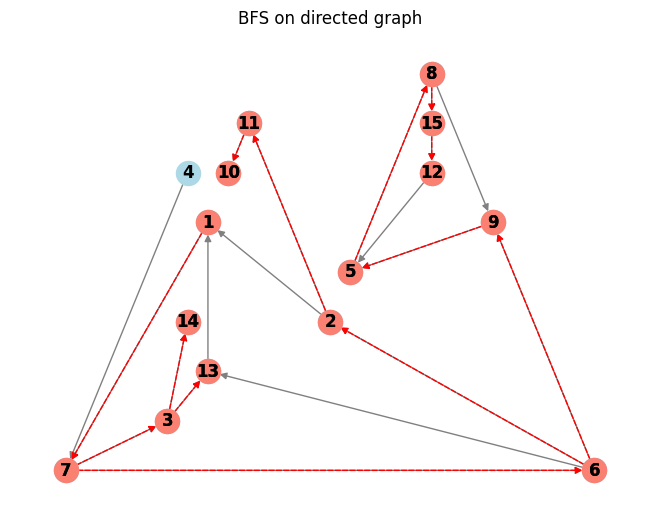

In [114]:
# Creating a directed graph
G = ntx.DiGraph()

# Add nodes and edges to the graph
G.add_edges_from([(3, 14), (3, 13), (7, 3), (13, 1), (6, 13), (7, 6),
                  (1, 7), (4, 7), (6, 9), (2, 1), (6, 2), (2, 11), (11, 10),
                  (9, 5), (12, 5), (8, 9), (5, 8), (8, 15), (15, 12)])

# Set start node as wished and run BFS function to obtain the edge set for BFS tree
start_node = 1
bfs_tree_edges = bfs_tree(G, start_node)

# Creating the BFS graph with obtained edge set
bfs_tree_graph = ntx.DiGraph(list(bfs_tree_edges.keys()))

# Planar layout used to create a graph that will easily convey information
pos = ntx.planar_layout(G)

# Both the original and DFS versions of the graph are displayed to show the 
# BFS tree in contrast to the original graph it was performed on
ntx.draw(G, pos, with_labels=True, font_weight='bold',
         node_color='lightblue', edge_color='gray')
ntx.draw(bfs_tree_graph, pos, with_labels=True, font_weight='bold',
         node_color='salmon', edge_color='red', style='dashed')

plt.title("BFS on directed graph")
plt.show()


## Running BFS on an undirected graph

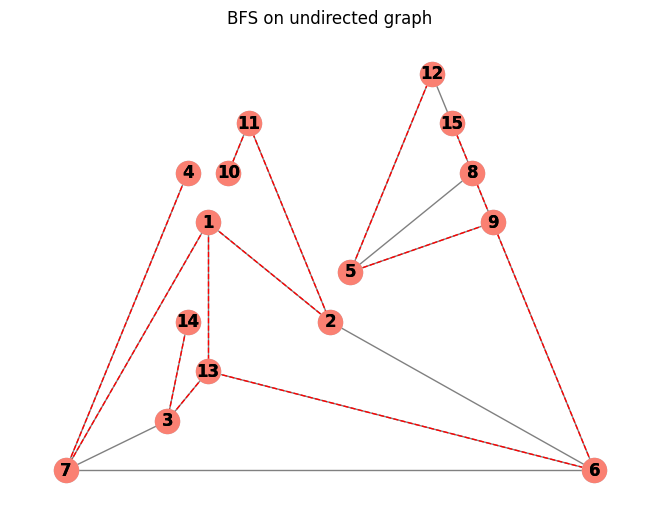

In [113]:
G = ntx.Graph()

G.add_edges_from([(3, 14), (3, 13), (7, 3), (13, 1), (6, 13), (7, 6),
                  (1, 7), (4, 7), (6, 9), (2, 1), (6, 2), (2, 11), (11, 10),
                  (9, 5), (12, 5), (8, 9), (5, 8), (8, 15), (15, 12)])

start_node = 1
bfs_tree_edges = bfs_tree(G, start_node)

bfs_tree_graph = ntx.Graph(list(bfs_tree_edges.keys()))

pos = ntx.planar_layout(G)

ntx.draw(G, pos, with_labels=True, font_weight='bold',
         node_color='lightblue', edge_color='gray')
ntx.draw(bfs_tree_graph, pos, with_labels=True, font_weight='bold',
         node_color='salmon', edge_color='red', style='dashed')

plt.title("BFS on undirected graph")
plt.show()

# Max-Flow Algorithm

#### Function to check whether a path from source to sink exists (stopping criteria)

In [109]:
def check_valid_path(graph, current_node, sink, current_path):
    if current_node == sink:
        return current_path

    for edge in graph.neighbors(current_node):
        slack = graph[current_node][edge]['capacity'] - graph[current_node][edge]['flow']
        if slack > 0 and edge not in current_path:
            resultant_path = check_valid_path(graph, edge, sink,
                                              current_path + [(current_node, edge)])
            if resultant_path is not None:
                return resultant_path

#### Code for the augmenting flow algorithm

In [110]:
def augmenting_flow(graph, source, sink):
    max_flow = 0
    iterated_path = check_valid_path(graph, source, sink, [])

    while iterated_path is not None:
        slacks = []
        for u, v in iterated_path:
            slacks.append(graph[u][v]['capacity'] - graph[u][v]['flow'])
        min_slack = min(slacks)
        
        for u, v in iterated_path:
            graph[u][v]['flow'] += min_slack
        
        max_flow += min_slack

        print("Minimum Slack for the current path is : ", min_slack)
        for nodes in iterated_path:
            print(f"{nodes} ", end = ' ')
        print("\n")

        iterated_path = check_valid_path(graph, source, sink, [])

    return max_flow

#### View of graph before applying the algorithm

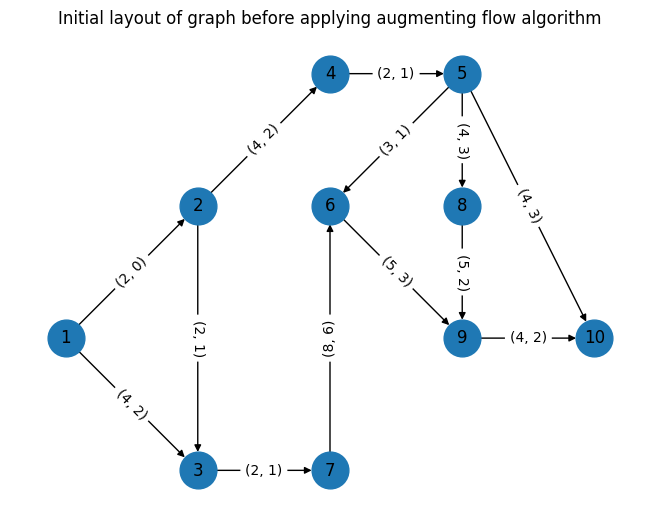

Minimum Slack for the current path is :  1
(1, 2)  (2, 3)  (3, 7)  (7, 6)  (6, 9)  (9, 10)  

Minimum Slack for the current path is :  1
(1, 2)  (2, 4)  (4, 5)  (5, 6)  (6, 9)  (9, 10)  

Max Flow for the given graph is:  2


In [111]:
G = ntx.DiGraph()
G.add_edge(1, 2, capacity = 2, flow = 0)
G.add_edge(1, 3, capacity = 4, flow = 2)
G.add_edge(2, 3, capacity = 2, flow = 1)
G.add_edge(2, 4, capacity = 4, flow = 2)
G.add_edge(3, 7, capacity = 2, flow = 1)
G.add_edge(4, 5, capacity = 2, flow = 1)
G.add_edge(7, 6, capacity = 8, flow = 6)
G.add_edge(5, 6, capacity = 3, flow = 1)
G.add_edge(6, 9, capacity = 5, flow = 3)
G.add_edge(5, 8, capacity = 4, flow = 3)
G.add_edge(8, 9, capacity = 5, flow = 2)
G.add_edge(5, 10, capacity = 4, flow = 3)
G.add_edge(9, 10, capacity = 4, flow = 2)

pos = {1: (0,0), 2: (1,1), 3: (1,-1), 4: (2,2), 5: (3,2),
       6: (2,1), 7: (2,-1), 8: (3,1), 9: (3,0), 10: (4,0)}
ntx.draw(G, pos, with_labels = True, node_size = 700)
capcity_flow_labels = {(u, v): f"({G[u][v]['capacity']}, {G[u][v]['flow']})" for u, v in G.edges()}
ntx.draw_networkx_edge_labels(G, pos, edge_labels = capcity_flow_labels)
flow_label = ntx.get_edge_attributes(G, 'flow')
cap_label = ntx.get_edge_attributes(G, 'capacity')
plt.title("Initial layout of graph before applying augmenting flow algorithm")
plt.show()

print("Max Flow for the given graph is: ", augmenting_flow(G, 1, 10))

#### View of graph after applying the algorithm

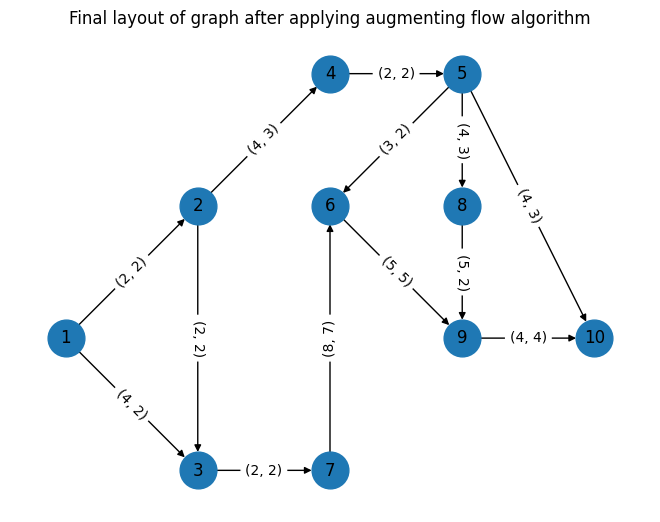

In [112]:
G = ntx.DiGraph()
G.add_edge(1, 2, capacity = 2, flow = 2)
G.add_edge(1, 3, capacity = 4, flow = 2)
G.add_edge(2, 3, capacity = 2, flow = 2)
G.add_edge(2, 4, capacity = 4, flow = 3)
G.add_edge(3, 7, capacity = 2, flow = 2)
G.add_edge(4, 5, capacity = 2, flow = 2)
G.add_edge(7, 6, capacity = 8, flow = 7)
G.add_edge(5, 6, capacity = 3, flow = 2)
G.add_edge(6, 9, capacity = 5, flow = 5)
G.add_edge(5, 8, capacity = 4, flow = 3)
G.add_edge(8, 9, capacity = 5, flow = 2)
G.add_edge(5, 10, capacity = 4, flow = 3)
G.add_edge(9, 10, capacity = 4, flow = 4)

pos = {1: (0,0), 2: (1,1), 3: (1,-1), 4: (2,2), 5: (3,2),
       6: (2,1), 7: (2,-1), 8: (3,1), 9: (3,0), 10: (4,0)}
ntx.draw(G, pos, with_labels = True, node_size = 700)
capcity_flow_labels = {(u, v): f"({G[u][v]['capacity']}, {G[u][v]['flow']})" for u, v in G.edges()}
ntx.draw_networkx_edge_labels(G, pos, edge_labels = capcity_flow_labels)
flow_label = ntx.get_edge_attributes(G, 'flow')
cap_label = ntx.get_edge_attributes(G, 'capacity')
plt.title("Final layout of graph after applying augmenting flow algorithm")
plt.show()